# Colour Detection with OpenCV

In [1]:
#Importing required libraries
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Detecting RGB colours using HSV frame:

HSV color space is more often used in machine vision owing to its superior performance compared to RGB color space in varying illumination levels.HSV means Hue-Saturation-Value, where the Hue is the color.Saturation is the greyness, so that a Saturation value near 0 means it is dull or grey looking.

### Red Colour:

In [2]:
cap = cv2.VideoCapture(0)                      #capturing video through webcam(indicated by 0)                                 
while True:
    _,frame = cap.read()
    hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV) #color conversion:or BGR → HSV, we use the flag cv.COLOR_BGR2HSV.
    #Red color
    low_red = np.array([161, 155, 84])
    high_red = np.array([179, 255, 255])              #ranges for red colour
    
    red_mask = cv2.inRange(hsv_frame, low_red, high_red)  
    #inRange method which returns a mask, specifying which pixels fall into your specified upper and lower range
    red = cv2.bitwise_and(frame, frame, mask=red_mask)
    #Calculates the per-element bit-wise conjunction of two arrays or an array and a scalar.(mask applied)
    
    cv2.imshow("Red", red)
    cv2.imshow("Frame",frame)   #used to display an image in a window
    key = cv2.waitKey(1)
    #waitKey(1)(in ms) will wait for keyPress it will continue to refresh and read frame from your webcam using cap.read().
    if key== 27:
        cv2.destroyAllWindows()   #destroys windows when escape is pressed
        break

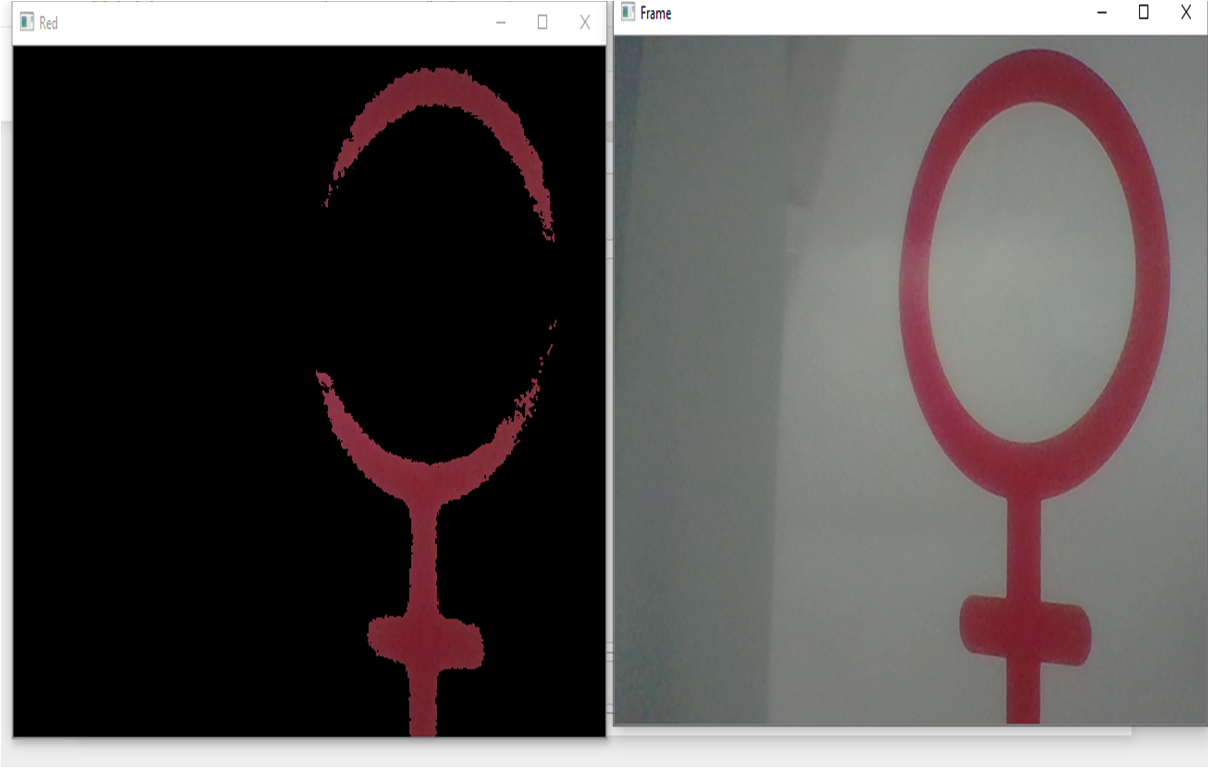

In [12]:
#screenshot for red
from IPython.display import Image
Image(filename="red.png")

### Blue colour:

In [3]:
# similar to that of red colour
cap = cv2.VideoCapture(0)
while True:
    _,frame = cap.read()
    hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    #blue colour
    low_blue = np.array([94, 80, 2])
    high_blue = np.array([126, 255, 255])  #range for blue
    
    blue_mask = cv2.inRange(hsv_frame, low_blue, high_blue)
    blue = cv2.bitwise_and(frame, frame, mask=blue_mask)

    cv2.imshow("Blue", blue)
    cv2.imshow("Frame",frame)
    key = cv2.waitKey(1)
    if key== 27:
        cv2.destroyAllWindows()
        break

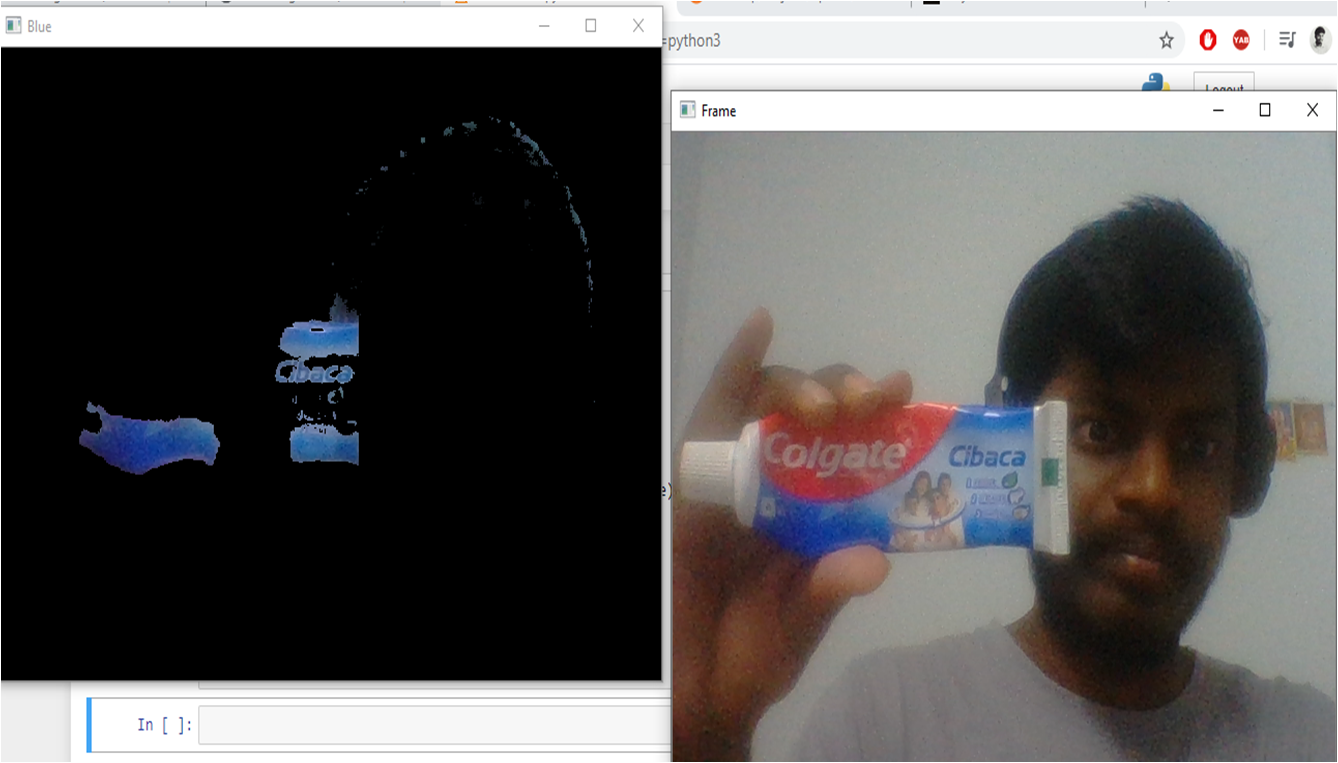

In [13]:
#screenshot for blue
from IPython.display import Image
Image(filename="blue.png")

### Green colour:

In [4]:
# similar to that of red
cap = cv2.VideoCapture(0)
while True:
    _,frame = cap.read()
    hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    #green colour
    low_green = np.array([25, 52, 72])
    high_green = np.array([102, 255, 255])   #range for green
    
    green_mask = cv2.inRange(hsv_frame, low_green, high_green)
    green = cv2.bitwise_and(frame, frame, mask=green_mask)

    cv2.imshow("Green", green)
    cv2.imshow("Frame",frame)
    key = cv2.waitKey(1)
    if key== 27:
        cv2.destroyAllWindows()
        break

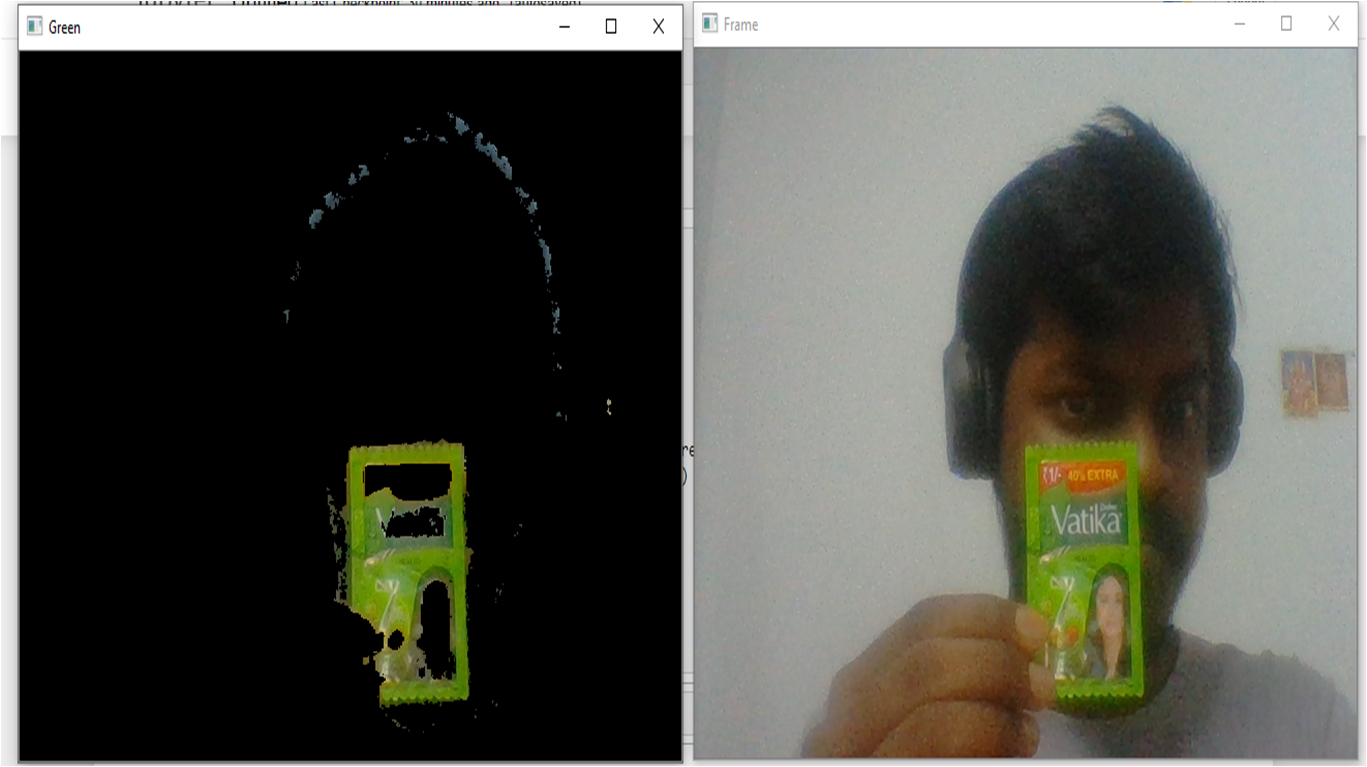

In [14]:
#screenshot for green
from IPython.display import Image
Image(filename="green.png")

### Detection of name of colours:

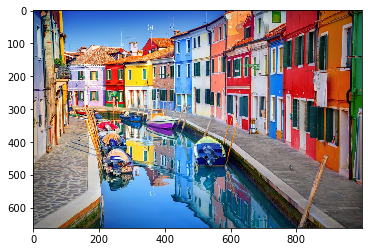

In [5]:
img = cv2.imread('colorpic.jpg',cv2.IMREAD_COLOR)  #loads image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # Printing the image

In [6]:
# Declaring global variables
clicked = False
r = g = b = xpos = ypos = 0

In [7]:
#Reading csv file with pandas and giving names to each column
index=["color","color_name","hex","R","G","B"]
csv = pd.read_csv('colors.csv', names=index, header=None)
csv.head()  

color             color_name      hex    R    G    B
0    air_force_blue_raf   Air Force Blue (Raf)  #5d8aa8   93  138  168
1   air_force_blue_usaf  Air Force Blue (Usaf)  #00308f    0   48  143
2  air_superiority_blue   Air Superiority Blue  #72a0c1  114  160  193
3       alabama_crimson        Alabama Crimson  #a32638  163   38   56
4            alice_blue             Alice Blue  #f0f8ff  240  248  255

#### distance calculation formula:
d = abs(Red – ithRedColor) + (Green – ithGreenColor) + (Blue – ithBlueColor)

In [8]:
#function to calculate minimum distance from all colors and get the most matching color
def getColorName(R,G,B):
    minimum = 10000
    for i in range(len(csv)):
        d = abs(R- int(csv.loc[i,"R"])) + abs(G- int(csv.loc[i,"G"]))+ abs(B- int(csv.loc[i,"B"]))
        if(d<=minimum):
            minimum = d
            cname = csv.loc[i,"color_name"]
    return cname   

In [9]:
#function to get x,y coordinates of mouse double click
def draw_function(event, x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDBLCLK:   # left mouse button double click
        global b,g,r,xpos,ypos, clicked
        clicked = True
        xpos = x
        ypos = y
        b,g,r = img[y,x]
        b = int(b)
        g = int(g)
        r = int(r)

In [10]:
clicked = False
r = g = b = xpos = ypos = 0

cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_function)  # callback function will be called when a mouse event happens.

while(1):

    cv2.imshow("image",img)
    if (clicked):
   
        #cv2.rectangle(image, startpoint, endpoint, color, thickness)-1 fills entire rectangle 
        cv2.rectangle(img,(20,20), (750,60), (b,g,r), -1)

        #Creating text string to display( Color name and RGB values )
        text = getColorName(r,g,b) + ' R='+ str(r) +  ' G='+ str(g) +  ' B='+ str(b)  #function call
        
        #cv2.putText(img,text,start,font(0-7),fontScale,color,thickness,lineType ),used to draw a text string on any image
        cv2.putText(img, text,(50,50),2,0.8,(255,255,255),2,cv2.LINE_AA)

        #For very light colours we will display text in black colour
        if(r+g+b>=600):
            cv2.putText(img, text,(50,50),2,0.8,(0,0,0),2,cv2.LINE_AA)
            
        clicked=False

    #Break the loop when user hits 'esc' key    
    if cv2.waitKey(20) & 0xFF ==27:
        break
    
cv2.destroyAllWindows()

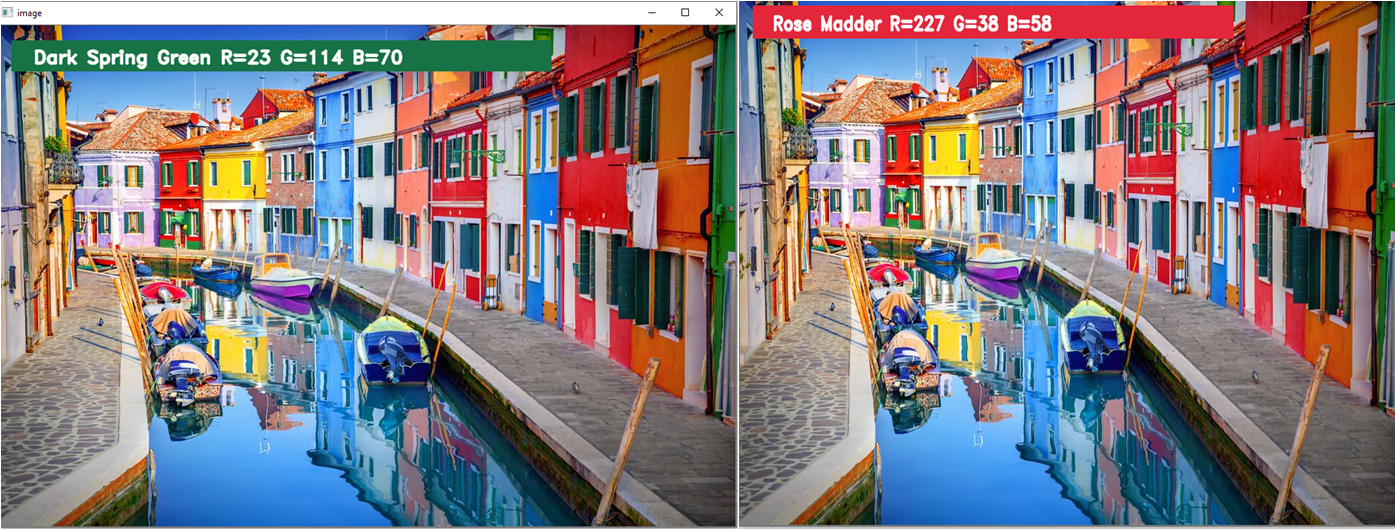

In [15]:
#screenshot for naming colours
from IPython.display import Image
Image(filename="naming colour.png")